In [2]:
# Imports
from BoundaryConditions.Simulation.SimulationData import getSimData
from GenericModel.Design import generateGenericCell
from GenericModel.PARAMETER import PBTYPES_NOW as pBTypes
from SystemComponentsFast import simulate
from PostProcesing import plots, dataCollection
import logging

ModuleNotFoundError: No module named 'BoundaryConditions'

In [2]:
FORMAT = '%(levelname)s %(name)s %(asctime)-15s %(filename)s:%(lineno)d %(message)s'
logging.basicConfig(format=FORMAT)
logging.getLogger().setLevel(logging.WARNING)

In [3]:
# Parameter
# time
start = '01.01.2020'
end = '07.01.2020'
# agents
nSepBSLagents = 100
pAgricultureBSLsep = 0.7
nBuildings = {'FSH': 505, 'REH': 1010, 'SAH': 680, 'BAH': 100}
pAgents = {'FSH': 0.9, 'REH': 0.9, 'SAH': 0.85, 'BAH': 0.75}
pPHHagents = {'FSH': 0.8, 'REH': 0.8, 'SAH': 0.6, 'BAH': 0.9}
pAgriculture = {'FSH': 0.2, 'REH': 0.2, 'SAH': 0.0, 'BAH': 0.0}
# district heating and PV
pDHN = {'FSH': 0.00, 'REH': 0.00, 'SAH': 0.0, 'BAH': 0.0}
pPVplants = 0.0
pHeatpumps = {'class_1': 0, 'class_2': 0, 'class_3': 0, 'class_4': 0.12, 'class_5': 0.27}
pCHP = 0.5
# buildings are imported
# environment
region = "East"

In [4]:
# prepare simulation
nSteps, time, SLP_PHH, SLP_BSLa, SLP_BSLc, HWP, T, Eg = getSimData(start, end, region)

In [5]:
cell = generateGenericCell(nBuildings, pAgents,
                           pPHHagents, pAgriculture,
                           pDHN, pPVplants, pHeatpumps, pCHP, pBTypes, 
                           nSepBSLagents, pAgricultureBSLsep,
                           region, nSteps)

In [6]:
simulate(cell, nSteps, SLP_PHH, SLP_BSLa, SLP_BSLc, HWP, T, Eg)

In [7]:
plots.cellPowerBalance(cell, time)

In [8]:
plots.cellEnergyBalance(cell, time)

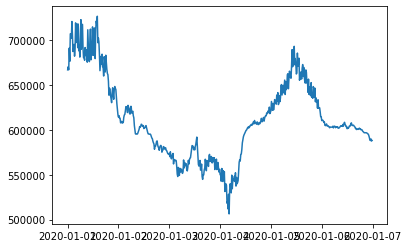

In [9]:
from matplotlib import pyplot as plt
gen_t = dataCollection.getCellsHPgeneration(cell)
plt.plot(time,gen_t)

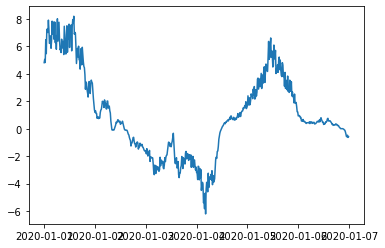

In [10]:
plt.plot(time,T)

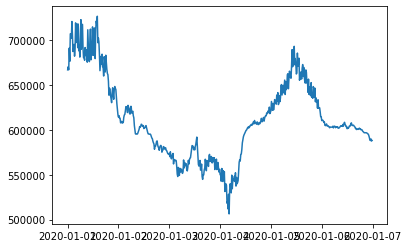

In [11]:
from matplotlib import pyplot as plt
con_e = dataCollection.getCellsHPconsumption(cell)
plt.plot(time,gen_t)

In [13]:
sum = 0
for building in cell.buildings:
    if building.heatpump:
        sum += building.heatpump.heatpump.pow_t
print(sum)

636966.8955078125
